In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

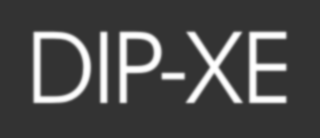

In [85]:
img = cv2.imread("/content/drive/MyDrive/Image processing /DIP-XE.png",0)
cv2_imshow(img)

# **Laplacian Operator**

In [86]:
def laplacian(img, kernel_size):
    padd = kernel_size // 2
    height, width = img.shape[:2]
    new_height = height + 2 * padd
    new_width = width + 2 * padd
    new_image = np.zeros((new_height, new_width), dtype=img.dtype)
    i = padd

    for r in range(padd, height + padd):
        k = padd
        for c in range(padd, width + padd):
            new_image[i, k] = img[r - padd, c - padd]
            k += 1
        i += 1

    
    output = np.zeros((height, width), dtype=img.dtype)
    for x in range(padd, height + padd):
        for y in range(padd, width + padd):
            dx = new_image[x, y + 1] - 2 * new_image[x, y] + new_image[x, y - 1]
            dy = new_image[x + 1, y] - 2 * new_image[x, y] + new_image[x - 1, y]
            output[x - padd, y - padd] = dx + dy

    return output

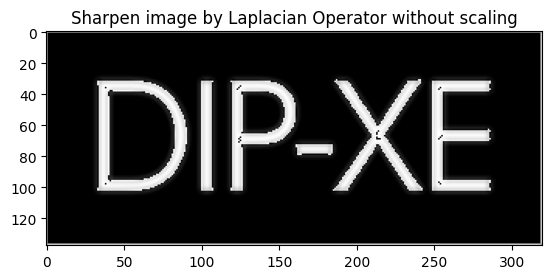

In [87]:
lpo_without_scaling = laplacian(gray_img, kernel_size=3)
plt.imshow(lpo_without_scaling, cmap='gray')
plt.title('Sharpen image by Laplacian Operator without scaling')
plt.show()

In [106]:
def laplacianscaling(img,scale,kernel_size):
    padd = kernel_size // 2
    height, width = img.shape[:2]
    new_height = height + 2 * padd
    new_width = width + 2 * padd
    new_image = np.zeros((new_height, new_width), dtype=img.dtype)
    i = padd

    for r in range(padd, height + padd):
        k = padd
        for c in range(padd, width + padd):
            new_image[i, k] = img[r - padd, c - padd]
            k += 1
        i += 1

   
    output2 = np.zeros((height, width), dtype=img.dtype)
    for R in range(padd, height + padd):
        for C in range(padd, width + padd):
            dx = new_image[R,C+1]-2*new_image[R,C]+new_image[R,C-1]
            dy = new_image[R+1,C]-2*new_image[R,C]+new_image[R-1,C]
            output2[R - padd, C - padd] = dx + dy
    output2 = output2 * scale
    min = np.min(output2)
    max = np.max(output2)
    output2 = ((output2 - min) / (max - min)) * 255

    return output2

Text(0.5, 1.0, 'Sharpen image by Laplacian Operator with scaling')

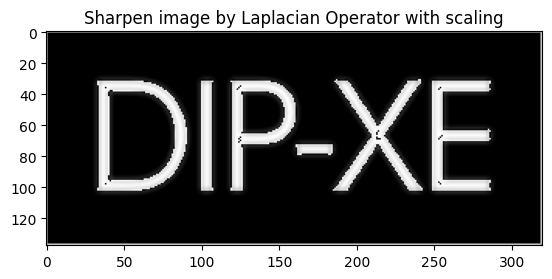

In [116]:
lpo_with_scaling = laplacianscaling(img,1,kernel_size=3)
plt.imshow(lpo_with_scaling,cmap='gray')
plt.title('Sharpen image by Laplacian Operator with scaling')

In [122]:
def Cross_Gradient_Operators(img,kernel_size):
    padd = kernel_size // 2
    height, width = img.shape[:2]
    new_height = height + 2 * padd
    new_width = width + 2 * padd
    new_image = np.zeros((new_height, new_width), dtype=img.dtype)
    i = padd

    for r in range(padd, height + padd):
        k = padd
        for c in range(padd, width + padd):
            new_image[i, k] = img[r - padd, c - padd]
            k += 1
        i += 1

   
    output3 = np.zeros((height, width), dtype=img.dtype)
    output4 = np.zeros((height, width), dtype=img.dtype)
    output5 = np.zeros((height, width), dtype=img.dtype)
    for a in range(padd, height + padd):
      for z in range(padd, width + padd):
          dxx = new_image[a,z]-new_image[a+1,z+1]
          dyy = new_image[a+1,z]-new_image[a,z+1]
          output3[a- padd,z- padd] = dxx
          output4[a - padd,z - padd] = dyy
          output5[a - padd,z - padd] = dxx + dyy

    return output3,output4,output5

<ipython-input-122-ecd2d737dbb9>:22: RuntimeWarning: overflow encountered in ubyte_scalars
  dxx = new_image[a,z]-new_image[a+1,z+1]
<ipython-input-122-ecd2d737dbb9>:26: RuntimeWarning: overflow encountered in ubyte_scalars
  output5[a - padd,z - padd] = dxx + dyy
<ipython-input-122-ecd2d737dbb9>:23: RuntimeWarning: overflow encountered in ubyte_scalars
  dyy = new_image[a+1,z]-new_image[a,z+1]


Text(0.5, 1.0, 'Final RCG')

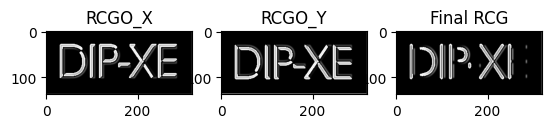

In [123]:
RCGO_X,RCGO_Y,Final_RCGO = Cross_Gradient_Operators(img,kernel_size=3)

plt.subplot(1,3,1)
plt.imshow(RCGO_X, cmap='gray')
plt.title('RCGO_X')
plt.subplot(1,3,2)
plt.imshow(RCGO_Y, cmap='gray')
plt.title('RCGO_Y')
plt.subplot(1,3,3)
plt.imshow(Final_RCGO,cmap='gray')
plt.title('Final RCG')

In [124]:
def sobel(img,kernel_size):
    padd = kernel_size // 2
    height, width = img.shape[:2]
    new_height = height + 2 * padd
    new_width = width + 2 * padd
    new_image = np.zeros((new_height, new_width), dtype=img.dtype)
    i = padd

    for r in range(padd, height + padd):
        k = padd
        for c in range(padd, width + padd):
            new_image[i, k] = img[r - padd, c - padd]
            k += 1
        i += 1

   
    output6 = np.zeros((height, width), dtype=img.dtype)
    output7 = np.zeros((height, width), dtype=img.dtype)
    output8 = np.zeros((height, width), dtype=img.dtype)
    kernel_H = [[-1, 0, 1], 
              [-2, 0, 2], 
              [-1, 0, 1]]


    kernel_V = [[-1, -2, -1], 
                [ 0,  0,  0], 
                [ 1,  2,  1]]


    for h in range(1, height - 1):  
      for v in range(1, width - 1):
        sh = 0
        sv = 0
        for ind in range(-1, 2):
          for jnd in range(-1, 2):
            sh += kernel_H[ind + 1][jnd + 1] * new_image[h + ind, v + jnd]
            sv += kernel_V[ind + 1][jnd + 1] * new_image[h + ind, v + jnd]
        output6[h, v] = sh
        output7[h, v] = sv
        output8[h, v] = sh + sv

    return output6,output7,output8

Text(0.5, 1.0, 'Final sopel')

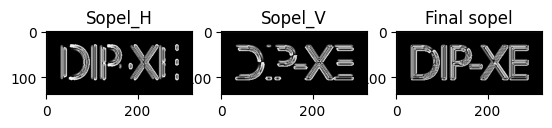

In [125]:
S_H , S_V , F_S = sobel(img,kernel_size=3)

plt.subplot(1,3,1)
plt.imshow(S_H, cmap='gray')
plt.title('Sopel_H')
plt.subplot(1,3,2)
plt.imshow(S_V, cmap='gray')
plt.title('Sopel_V')
plt.subplot(1,3,3)
plt.imshow(F_S,cmap='gray')
plt.title('Final sopel')

In [131]:
def unsharp_masking_and_Highboost_masking(img, kernel_size,const):
    padd = kernel_size // 2
    height, width = img.shape[:2]
    new_height = height + 2 * padd
    new_width = width + 2 * padd
    new_image = np.zeros((new_height, new_width), dtype=img.dtype)
    i = padd

    for r in range(padd, height + padd):
        j = padd
        for c in range(padd, width + padd):
            new_image[i, j] = img[r - padd, c - padd]
            j += 1
        i += 1
    
    #Average --> Blured Image
    avg_img = np.zeros((new_height,new_width))

    for o in range(padd,new_height - padd):
      for l in range(padd,new_width - padd):
        tot = 0
        for d in range(-padd,padd+1):
          for f in range(-padd,padd+1):
            tot += new_image[o+d,l+f]
        avg_img[o,l] = tot / (kernel_size ** 2)

    avg_img = avg_img[padd:height+padd, padd:width+padd]  

    unsharp_mask = img - avg_img
    sharp_img = img + const * unsharp_mask
    
    
    return sharp_img , avg_img

Text(0.5, 1.0, 'Sharp Image by unsharp masking')

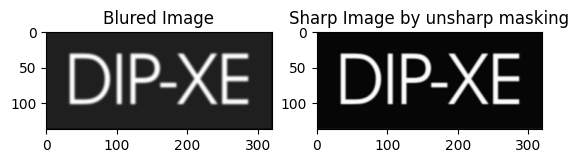

In [133]:
masking,avg = unsharp_masking_and_Highboost_masking(img,3,1)
plt.subplot(1,2,1)
plt.imshow(avg,cmap='gray')
plt.title('Blured Image')
plt.subplot(1,2,2)
plt.imshow(masking,cmap='gray')
plt.title('Sharp Image by unsharp masking')

Text(0.5, 1.0, 'Highboost masking')

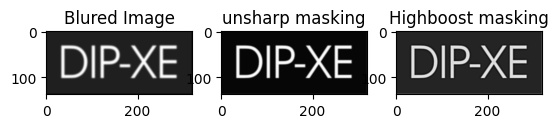

In [139]:
himasking,avg = unsharp_masking_and_Highboost_masking(img,3,4)
plt.subplot(1,3,1)
plt.imshow(avg,cmap='gray')
plt.title('Blured Image')

plt.subplot(1,3,2)
plt.imshow(masking,cmap='gray')
plt.title('unsharp masking')

plt.subplot(1,3,3)
plt.imshow(himasking,cmap='gray')
plt.title('Highboost masking')